In [6]:
# Import libraries
import os
import cv2
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout,Flatten, BatchNormalization, MaxPooling2D,Concatenate,Reshape,Activation
from keras.models import Sequential

In [13]:
# Splitting the normal images and abnormally detected images
normal_path='G:/College/III Year/Deep Learning/MRI/Healthy/'
abnormal_path= 'G:/College/III Year/Deep Learning/MRI/Unhealthy/'
abnormal = []
for filename in os.listdir(abnormal_path):
    if filename.endswith(".png"):
        img = image.load_img(abnormal_path+filename, target_size=(231, 231))
        abnormal.append(image.img_to_array(img))
abnormal = np.array(abnormal)

normal = []
for filename in os.listdir(normal_path):
    if filename.endswith(".png"):
        img = image.load_img(normal_path+filename, target_size=(231, 231))
        normal.append(image.img_to_array(img))
normal = np.array(normal)

In [14]:
print("abnormal", abnormal.shape)
print("normal", normal.shape)

abnormal (226, 231, 231, 3)
normal (683, 231, 231, 3)


In [15]:
imag = cv2.imread("G:/College/III Year/Deep Learning/MRI/Healthy/329637_0.png")
gray = cv2.cvtColor(imag, cv2.COLOR_BGR2GRAY)

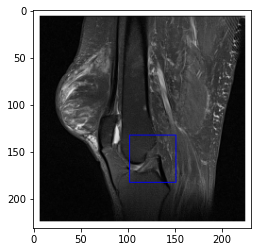

In [16]:
plt.imshow(imag)

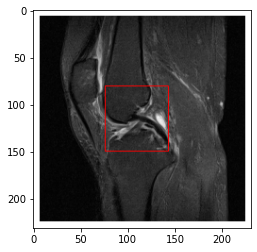

In [17]:
# Ruptured ligament tear
plt.imshow(image.array_to_img(abnormal[0]))

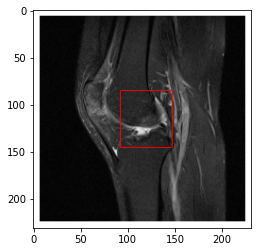

In [18]:
# Healthy ligament
plt.imshow(image.array_to_img(normal[0]))

### Data Augmentation

In [19]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
rescale =1./255,validation_split=0.4
)
test_datagen=ImageDataGenerator(
rescale =1./255,validation_split=0.2
)

In [20]:
# Training, validation and testing
path = "G:\College\III Year\Deep Learning\MRI"
train = datagen.flow_from_directory(
    path,
    class_mode = "binary",
    batch_size = 32,
    color_mode='rgb',
    target_size = (231,231),
    subset = "training"
)
val = datagen.flow_from_directory(
    path,
    class_mode = "binary",
    batch_size = 32,
    color_mode='rgb',
    target_size = (231,231),
    subset = "validation"
)
test = test_datagen.flow_from_directory(
    path,
    class_mode = "binary",
    batch_size = 32,
    color_mode='rgb',
    target_size = (231,231))

Found 546 images belonging to 2 classes.
Found 363 images belonging to 2 classes.
Found 909 images belonging to 2 classes.


## Model 1 - CNN

In [457]:
model1 = Sequential([
               Conv2D(128,input_shape=(232,231,3),kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'), 
               MaxPool2D(pool_size=(2,2), strides=(1,1)) ,

               Conv2D(64,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'),
               MaxPool2D(pool_size=(2,2), strides=(1,1)),

               Conv2D(32,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'),
               MaxPool2D(pool_size=(2,2), strides=(1,1)) , 
               
               Conv2D(16,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'), 
               MaxPool2D(pool_size=(2,2), strides=(1,1)) ,   

               Flatten(),
               Dense(512,input_shape=(231,231),activation='relu'),
               Dropout(0.5), 
    
               Dense(128,activation='relu'),
               Dropout(0.5), 
               Dense(1,activation='sigmoid')
])

In [458]:
model1.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [459]:
model1.fit_generator(train,epochs=10,validation_data=val)

<ipython-input-459-70ddb5162bdc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1.fit_generator(train,epochs=10,validation_data=val)


Epoch 1/10
18/18 [==============================] - 20s 1s/step - loss: 0.6261 - accuracy: 0.7308 - val_loss: 0.5632 - val_accuracy: 0.7521
Epoch 2/10
18/18 [==============================] - 18s 974ms/step - loss: 0.5732 - accuracy: 0.7509 - val_loss: 0.5759 - val_accuracy: 0.7521
Epoch 3/10
18/18 [==============================] - 19s 1s/step - loss: 0.5896 - accuracy: 0.7509 - val_loss: 0.6007 - val_accuracy: 0.7521
Epoch 4/10
18/18 [==============================] - 19s 1s/step - loss: 0.5690 - accuracy: 0.7509 - val_loss: 0.5763 - val_accuracy: 0.7521
Epoch 5/10
18/18 [==============================] - 18s 1s/step - loss: 0.5923 - accuracy: 0.7509 - val_loss: 0.5623 - val_accuracy: 0.7521
Epoch 6/10
18/18 [==============================] - 17s 1s/step - loss: 0.5647 - accuracy: 0.7509 - val_loss: 0.5637 - val_accuracy: 0.7521
Epoch 7/10
18/18 [==============================] - 17s 950ms/step - loss: 0.5714 - accuracy: 0.7509 - val_loss: 0.5595 - val_accuracy: 0.7521
Epoch 8/10
18/

In [462]:
model1.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_343 (Conv2D)         (None, 116, 116, 128)     3584      
                                                                 
 max_pooling2d_133 (MaxPooli  (None, 115, 115, 128)    0         
 ng2D)                                                           
                                                                 
 conv2d_344 (Conv2D)         (None, 58, 58, 64)        73792     
                                                                 
 max_pooling2d_134 (MaxPooli  (None, 57, 57, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_345 (Conv2D)         (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_135 (MaxPooli  (None, 28, 28, 32)     

In [463]:
score= model1.evaluate(test)
print("loss:",round(score[0],4))
print("accuracy:",round(score[1],4))

29/29 [==============================] - 5s 173ms/step - loss: 0.5594 - accuracy: 0.7514
loss: 0.5594
accuracy: 0.7514


## Model 2 - CNN

<img src="cnn arch.jpg" />

In [451]:
model2= Sequential([
    Conv2D(filters=64,kernel_size=(5,5),input_shape=(231,231,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(5,5),strides=(2,2)),
    Dropout(0.3),
   
    Conv2D(filters=64,kernel_size=(5,5),activation='relu',padding='same'),
    MaxPool2D(pool_size=(5,5),strides=(2,2)),
    
    Conv2D(filters=64,kernel_size=(5,5),activation='relu',padding='same'),
    MaxPool2D(pool_size=(5,5),strides=(2,2)),
    
    #Fully connected layer 1
    Dense(128,input_shape=(231,231),activation='relu'),
    #Fully connected layer 2
    Dense(64,activation='relu'),
    #Fully connected layer 3
    Dense(32,activation='relu'),
    Dropout(0.2),
    Flatten(),
   
    Dense(1,activation='sigmoid')
])

In [454]:
model2.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [455]:
model2.fit_generator(train,epochs=10,validation_data=val)

<ipython-input-455-f5a97315cbee>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2.fit_generator(train,epochs=10,validation_data=val)


Epoch 1/10
18/18 [==============================] - 47s 3s/step - loss: 0.5893 - accuracy: 0.7289 - val_loss: 0.5630 - val_accuracy: 0.7521
Epoch 2/10
18/18 [==============================] - 46s 3s/step - loss: 0.5984 - accuracy: 0.7509 - val_loss: 0.6581 - val_accuracy: 0.7521
Epoch 3/10
18/18 [==============================] - 48s 3s/step - loss: 0.5802 - accuracy: 0.7509 - val_loss: 0.5892 - val_accuracy: 0.7521
Epoch 4/10
18/18 [==============================] - 46s 3s/step - loss: 0.5857 - accuracy: 0.7509 - val_loss: 0.5894 - val_accuracy: 0.7521
Epoch 5/10
18/18 [==============================] - 46s 3s/step - loss: 0.5686 - accuracy: 0.7509 - val_loss: 0.5599 - val_accuracy: 0.7521
Epoch 6/10
18/18 [==============================] - 46s 3s/step - loss: 0.5656 - accuracy: 0.7509 - val_loss: 0.5754 - val_accuracy: 0.7521
Epoch 7/10
18/18 [==============================] - 49s 3s/step - loss: 0.5607 - accuracy: 0.7509 - val_loss: 0.5588 - val_accuracy: 0.7521
Epoch 8/10
18/18 [==

In [452]:
model2.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_340 (Conv2D)         (None, 231, 231, 64)      4864      
                                                                 
 max_pooling2d_130 (MaxPooli  (None, 114, 114, 64)     0         
 ng2D)                                                           
                                                                 
 dropout_114 (Dropout)       (None, 114, 114, 64)      0         
                                                                 
 conv2d_341 (Conv2D)         (None, 114, 114, 64)      102464    
                                                                 
 max_pooling2d_131 (MaxPooli  (None, 55, 55, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_342 (Conv2D)         (None, 55, 55, 64)      

In [456]:
score2=model2.evaluate(test)
print("loss:",round(score2[0],4))
print("accuracy:",round(score2[1],4))

29/29 [==============================] - 10s 348ms/step - loss: 0.5259 - accuracy: 0.7679
loss: 0.5259
accuracy: 0.7679


In [433]:
input_img = cv2.imread("G:/College/III Year/Deep Learning/MRI/Healthy/329637_0.png")
x=cv2.resize(input_img,(231,231))
x=np.expand_dims(x,axis=0)
pred= model2.predict(x)
if( pred<0.5):
     print("Class 0 : Healthy",pred)
else:
     print("Class 1 : Ruptured Ligament")

Class 0 : Healthy [[7.994093e-34]]


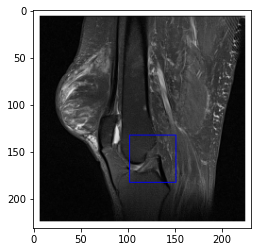

In [432]:
plt.imshow(input_img)

## Model 3 - VGG16 and VGG19


In [21]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(231,231,3),include_top=False, weights='imagenet')

In [22]:
for layer in base_model.layers:
    layer.trainable = False

In [23]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(1, activation='sigmoid')(x)

In [24]:
import tensorflow
vgg = tensorflow.keras.Model(base_model.input,x)

In [25]:
vgg.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy'])

In [26]:
vgg.fit_generator(steps_per_epoch=10,generator=train,epochs=10,validation_data=val)

<ipython-input-26-9ac084e5a73b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg.fit_generator(steps_per_epoch=10,generator=train,epochs=10,validation_data=val)


Epoch 1/10
10/10 [==============================] - 38s 4s/step - loss: 1.4573 - accuracy: 0.6379 - val_loss: 0.7360 - val_accuracy: 0.7521
Epoch 2/10
10/10 [==============================] - 37s 4s/step - loss: 0.6675 - accuracy: 0.6828 - val_loss: 0.5695 - val_accuracy: 0.7521
Epoch 3/10
10/10 [==============================] - 37s 4s/step - loss: 0.5791 - accuracy: 0.7379 - val_loss: 0.5335 - val_accuracy: 0.7521
Epoch 4/10
10/10 [==============================] - 37s 4s/step - loss: 0.5199 - accuracy: 0.7655 - val_loss: 0.5219 - val_accuracy: 0.7521
Epoch 5/10
10/10 [==============================] - 39s 4s/step - loss: 0.5111 - accuracy: 0.7563 - val_loss: 0.5147 - val_accuracy: 0.7521
Epoch 6/10
10/10 [==============================] - 39s 4s/step - loss: 0.5081 - accuracy: 0.7563 - val_loss: 0.5195 - val_accuracy: 0.7521
Epoch 7/10
10/10 [==============================] - 37s 4s/step - loss: 0.4819 - accuracy: 0.7414 - val_loss: 0.5086 - val_accuracy: 0.7741
Epoch 8/10
10/10 [==

In [27]:
vgg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 231, 231, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 231, 231, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 231, 231, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 115, 115, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 115, 115, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 115, 115, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 57, 57, 128)       0   

In [28]:
scorevgg=vgg.evaluate(test)
print("loss:",round(scorevgg[0],4))
print("accuracy",round(scorevgg[1],4))

29/29 [==============================] - 51s 2s/step - loss: 0.4532 - accuracy: 0.7591
loss: 0.4532
accuracy 0.7591


## VGG19

In [472]:
base_model = VGG19(input_shape=(231,231,3),include_top=False, weights='imagenet')

In [473]:
for layer in base_model.layers:
    layer.trainable = False

In [474]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(1, activation='sigmoid')(x)

In [475]:
import tensorflow
model3 = tensorflow.keras.Model(base_model.input,x)

In [478]:
model3.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy'])

In [479]:
model3.fit_generator(steps_per_epoch=10,generator=train,epochs=10,validation_data=val)

<ipython-input-479-b9257ca78f5f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model3.fit_generator(steps_per_epoch=10,generator=train,epochs=10,validation_data=val)


Epoch 1/10
10/10 [==============================] - 47s 5s/step - loss: 1.4500 - accuracy: 0.6517 - val_loss: 1.3663 - val_accuracy: 0.7521
Epoch 2/10
10/10 [==============================] - 51s 5s/step - loss: 0.8785 - accuracy: 0.6344 - val_loss: 0.5477 - val_accuracy: 0.7521
Epoch 3/10
10/10 [==============================] - 48s 5s/step - loss: 0.5816 - accuracy: 0.7379 - val_loss: 0.5554 - val_accuracy: 0.7521
Epoch 4/10
10/10 [==============================] - 51s 5s/step - loss: 0.5393 - accuracy: 0.7781 - val_loss: 0.5397 - val_accuracy: 0.7521
Epoch 5/10
10/10 [==============================] - 49s 5s/step - loss: 0.5473 - accuracy: 0.7310 - val_loss: 0.5247 - val_accuracy: 0.7521
Epoch 6/10
10/10 [==============================] - 49s 5s/step - loss: 0.5390 - accuracy: 0.7172 - val_loss: 0.5324 - val_accuracy: 0.7521
Epoch 7/10
10/10 [==============================] - 51s 5s/step - loss: 0.4968 - accuracy: 0.7625 - val_loss: 0.5128 - val_accuracy: 0.7521
Epoch 8/10
10/10 [==

In [480]:
score_vgg=model3.evaluate(test)
print("loss:",round(score_vgg[0],4))
print("accuracy",round(score_vgg[1],4))

29/29 [==============================] - 67s 2s/step - loss: 0.4567 - accuracy: 0.7514
loss: 0.4567
accuracy 0.7514


In [409]:
model3.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 231, 231, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 231, 231, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 231, 231, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 115, 115, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 115, 115, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 115, 115, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 57, 57, 128)       0  

Class 0 : Healthy


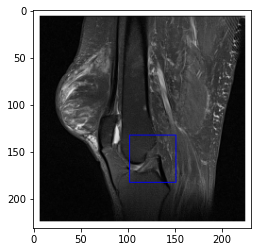

In [428]:
input_img = cv2.imread("G:/College/III Year/Deep Learning/MRI/Healthy/329637_0.png")
x=cv2.resize(input_img,(231,231))
x=np.expand_dims(x,axis=0)
pred= model3.predict(x)
if( pred<0.5):
     print("Class 0 : Healthy")
else:
     print("Class 1 : Ruptured Ligament")
plt.imshow(input_img)

## Model 4 - AlexNet Model

In [412]:
AlexNet=Sequential()
#First Convolution Layer

AlexNet.add(Conv2D(filters=96,input_shape=(231,231,3),kernel_size=(11,11),strides=(4,4),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'))

#Second Convolution Layer
AlexNet.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'))
#third Convolution layer
AlexNet.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Fourth Layer

AlexNet.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Fifth Layer#third Convolution layer
AlexNet.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'))
#First Fully connected Layer
AlexNet.add(Flatten())
AlexNet.add(Dense(4096,input_shape=(231,231,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#avoid overfitting perform Dropout
AlexNet.add(Dropout(0.4))
#Second Fully connected Layer

AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#avoid overfitting perform Dropout
AlexNet.add(Dropout(0.4))

#Third FC Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))

#output Layer
AlexNet.add(Dense(1))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('sigmoid'))



In [413]:
AlexNet.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
AlexNet.fit_generator(train, epochs=5, steps_per_epoch = 10,verbose = 1,validation_data=val)

<ipython-input-413-cbe5183bde23>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  AlexNet.fit_generator(train, epochs=5, steps_per_epoch = 10,verbose = 1,validation_data=val)


Epoch 1/5
10/10 [==============================] - 17s 2s/step - loss: 0.0000e+00 - accuracy: 0.5172 - val_loss: 0.0000e+00 - val_accuracy: 0.6860
Epoch 2/5
10/10 [==============================] - 15s 2s/step - loss: 0.0000e+00 - accuracy: 0.6448 - val_loss: 0.0000e+00 - val_accuracy: 0.7631
Epoch 3/5
10/10 [==============================] - 15s 2s/step - loss: 0.0000e+00 - accuracy: 0.6552 - val_loss: 0.0000e+00 - val_accuracy: 0.7603
Epoch 4/5
10/10 [==============================] - 15s 2s/step - loss: 0.0000e+00 - accuracy: 0.7000 - val_loss: 0.0000e+00 - val_accuracy: 0.7521
Epoch 5/5
10/10 [==============================] - 15s 2s/step - loss: 0.0000e+00 - accuracy: 0.6690 - val_loss: 0.0000e+00 - val_accuracy: 0.5923


In [414]:
alexnet_score = AlexNet.evaluate(test)
print("loss:",round(alexnet_score[0],2))
print("accuracy",round(alexnet_score[1],4))

29/29 [==============================] - 7s 224ms/step - loss: 0.0000e+00 - accuracy: 0.5985
loss: 0.0
accuracy 0.5985


#### Add an input image to test the predictions

Class 0 : Healthy


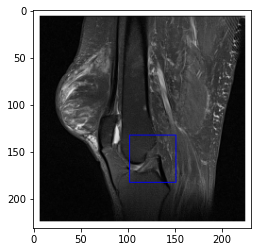

In [427]:
input_img = cv2.imread("G:/College/III Year/Deep Learning/MRI/Healthy/329637_0.png")

x=cv2.resize(input_img,(231,231))
x=np.expand_dims(x,axis=0)
pred= AlexNet.predict(x)
if( pred<0.5):
     print("Class 0 : Healthy")
else:
     print("Class 1 : Ruptured Ligament")
plt.imshow(input_img)

## Model 5 - InceptionV3 

In [268]:
import keras
from keras.layers import Input,Dense, Conv2D, MaxPool2D, Dropout,Flatten,Concatenate,Reshape,Activation
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from keras.layers import GlobalAveragePooling2D
from keras.applications.inception_v3 import InceptionV3

In [415]:
def inception_block(x,f):
  t1=Conv2D(f[0],1,activation='relu')(x) 

  t2=Conv2D(f[1],1,activation='relu')(x)
  t2=Conv2D(f[2],3,padding='same',activation='relu')(t2)

  t3=Conv2D(f[3],1,activation='relu')(x)
  t3=Conv2D(f[4],5,padding='same',activation='relu')(t3)

  t4=MaxPool2D(3,strides=1,padding='same')(x)
  t4=Conv2D(f[5],1,activation='relu')(t4)
  output=Concatenate()([t1,t2,t3,t4])
  return output

In [416]:
input=Input(shape=(231,231,3))
x=Conv2D(64,7,strides=2,padding='same',activation='relu')(input)
x=MaxPool2D(3,strides=2,padding='same')(x)
x=Conv2D(64,1,activation='relu')(x)
x=Conv2D(192,3,padding='same',activation='relu')(x)
x=MaxPool2D(3,strides=2,padding='same')(x)
x=inception_block(x,[64,96,128,16,32,32]) #inception block added

In [417]:
model5=InceptionV3(input_shape=(231,231,3),include_top=False,weights='imagenet')
batch_size=32
N_Class=1
x=model5.output
x=GlobalAveragePooling2D()(x)


for layer in model5.layers:
  layer.trainable=False
#x=base_model.output
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
predictions=Dense(N_Class,activation='sigmoid')(x)
model5=Model(model5.input,predictions)

In [418]:
model5.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [419]:
hist=model5.fit_generator(train,epochs=10,steps_per_epoch=10,shuffle=True,verbose=1,validation_data=val)

<ipython-input-419-6dbc8110834d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model5.fit_generator(train,epochs=10,steps_per_epoch=10,shuffle=True,verbose=1,validation_data=val)


Epoch 1/10
10/10 [==============================] - 15s 1s/step - loss: 2.2845 - accuracy: 0.6031 - val_loss: 1.4352 - val_accuracy: 0.2645
Epoch 2/10
10/10 [==============================] - 12s 1s/step - loss: 0.7867 - accuracy: 0.6375 - val_loss: 0.5500 - val_accuracy: 0.7521
Epoch 3/10
10/10 [==============================] - 11s 1s/step - loss: 0.5599 - accuracy: 0.7517 - val_loss: 0.6592 - val_accuracy: 0.7521
Epoch 4/10
10/10 [==============================] - 12s 1s/step - loss: 0.5160 - accuracy: 0.7724 - val_loss: 0.5407 - val_accuracy: 0.7355
Epoch 5/10
10/10 [==============================] - 12s 1s/step - loss: 0.4370 - accuracy: 0.8062 - val_loss: 0.5350 - val_accuracy: 0.7493
Epoch 6/10
10/10 [==============================] - 11s 1s/step - loss: 0.4756 - accuracy: 0.7793 - val_loss: 0.5435 - val_accuracy: 0.7273
Epoch 7/10
10/10 [==============================] - 11s 1s/step - loss: 0.4654 - accuracy: 0.8000 - val_loss: 0.5512 - val_accuracy: 0.7438
Epoch 8/10
10/10 [==

In [420]:
incep_score = model5.evaluate(test)
print("loss:",round(incep_score[0],4))
print("accuracy",round(incep_score[1],4))

29/29 [==============================] - 15s 506ms/step - loss: 0.4303 - accuracy: 0.8053
loss: 0.4303
accuracy 0.8053


#### Add an input image to test the predictions

Class 0 : Healthy


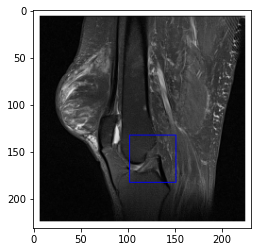

In [423]:
input_img = cv2.imread("G:/College/III Year/Deep Learning/MRI/Healthy/329637_0.png")

x=cv2.resize(input_img,(231,231))
x=np.expand_dims(x,axis=0)
pred= model5.predict(x)
if( pred<0.5):
     print("Class 0 : Healthy")
else:
     print("Class 1 : Ruptured Ligament")
plt.imshow(input_img)